<a href="https://colab.research.google.com/github/Roshnasviji/ML_google_colab/blob/main/credit_card_customer_data__KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
files.upload()

Saving Credit Card Customer Data.csv to Credit Card Customer Data.csv


{'Credit Card Customer Data.csv': b'Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made\r\n1,87073,100000,2,1,1,0\r\n2,38414,50000,3,0,10,9\r\n3,17341,50000,7,1,3,4\r\n4,40496,30000,5,1,1,4\r\n5,47437,100000,6,0,12,3\r\n6,58634,20000,3,0,1,8\r\n7,48370,100000,5,0,11,2\r\n8,37376,15000,3,0,1,1\r\n9,82490,5000,2,0,2,2\r\n10,44770,3000,4,0,1,7\r\n11,52741,10000,4,0,5,5\r\n12,52326,13000,3,0,2,7\r\n13,92503,11000,1,2,5,9\r\n14,25084,9000,1,1,5,6\r\n15,68517,6000,2,2,4,6\r\n16,55196,8000,2,0,5,7\r\n17,62617,15000,2,1,2,4\r\n18,96463,8000,2,0,3,4\r\n19,39137,11000,2,2,2,7\r\n20,14309,19000,4,1,5,8\r\n21,29794,5000,3,2,5,5\r\n22,87241,16000,2,0,3,7\r\n23,30507,6000,4,1,4,6\r\n24,61061,9000,1,1,3,4\r\n25,24001,8000,2,0,2,10\r\n26,68067,18000,1,1,5,10\r\n27,65034,16000,3,0,5,9\r\n28,14854,9000,2,2,2,10\r\n29,81130,5000,2,0,4,6\r\n30,29112,8000,4,0,4,7\r\n31,13999,16000,3,1,5,4\r\n32,32550,11000,3,1,5,6\r\n33,82164,6000,1,0,5,10\r\n34,615

In [3]:
customer_data = pd.read_csv('Credit Card Customer Data.csv')
customer_data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [4]:
customer_data.shape

(660, 7)

In [5]:
customer_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
customer_data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
customer_data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [9]:
X = customer_data.iloc[:,[5,6]].values

In [10]:
print(X)

[[ 1  0]
 [10  9]
 [ 3  4]
 ...
 [ 9  1]
 [15  0]
 [12  2]]


In [11]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [12]:
wcss

[11089.992424242415,
 6164.6682692307695,
 2591.6604425744117,
 1850.7509306786856,
 1425.0233945728316,
 1132.873491996911,
 973.4090376587444,
 834.8612195640615,
 738.1354330989649,
 643.8833924493515]

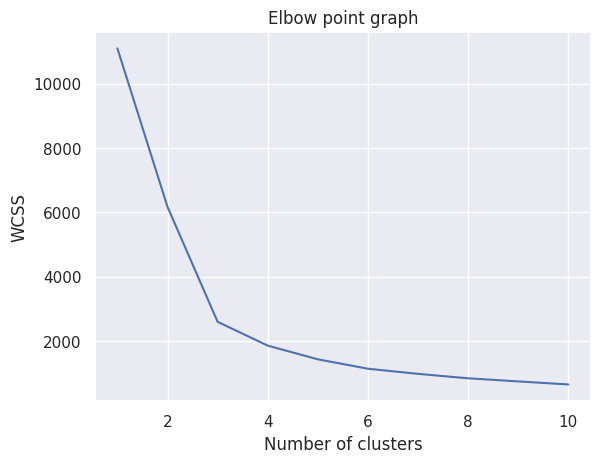

In [13]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

k = 3

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
Y = kmeans.fit_predict(X)
print(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 0 0 1 2 1 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

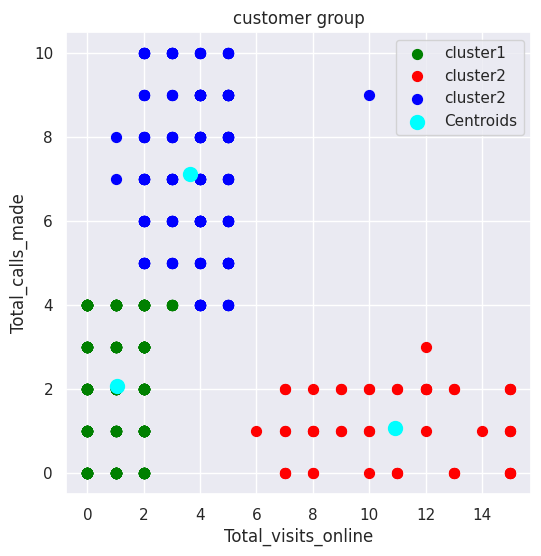

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label = 'cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c= 'red', label = 'cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label = 'cluster2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label = 'Centroids')
plt.title('customer group')
plt.xlabel('Total_visits_online')
plt.ylabel('Total_calls_made')
plt.legend()
plt.show()

In [21]:
X1 = customer_data.iloc[:,[4,5,6]].values

In [22]:
print(X1)

[[ 1  1  0]
 [ 0 10  9]
 [ 1  3  4]
 ...
 [ 1  9  1]
 [ 1 15  0]
 [ 0 12  2]]


In [23]:
wcss1 = []

for j in range(1,11):
  kmeans1 = KMeans(n_clusters = j , init = 'k-means++', random_state = 42)
  kmeans1.fit(X1)
  wcss1.append(kmeans1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [24]:
wcss1

[12844.786363636356,
 6890.3980191595765,
 3310.249125837816,
 2668.284953959199,
 2116.677733650606,
 1805.7977801894945,
 1548.964727951624,
 1387.450841814304,
 1276.4713309182534,
 1179.549097148847]

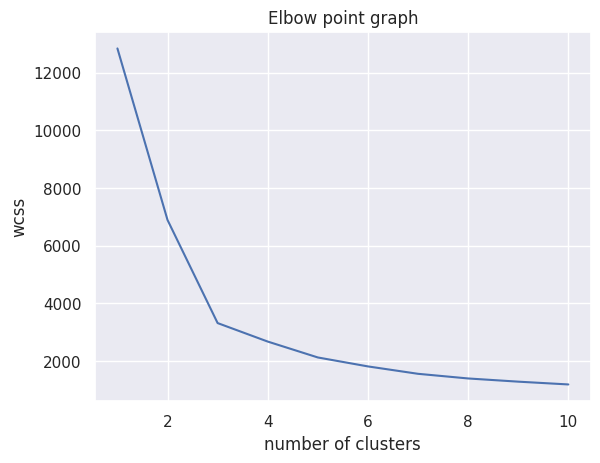

In [25]:
plt.plot(range(1,11),wcss1)
plt.title('Elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

number of clusters = 3

In [26]:
kmeans1 = KMeans(n_clusters = 3, init ='k-means++', random_state = 0)
Y1 = kmeans1.fit_predict(X1)

print(Y1)

[0 2 2 0 1 2 1 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


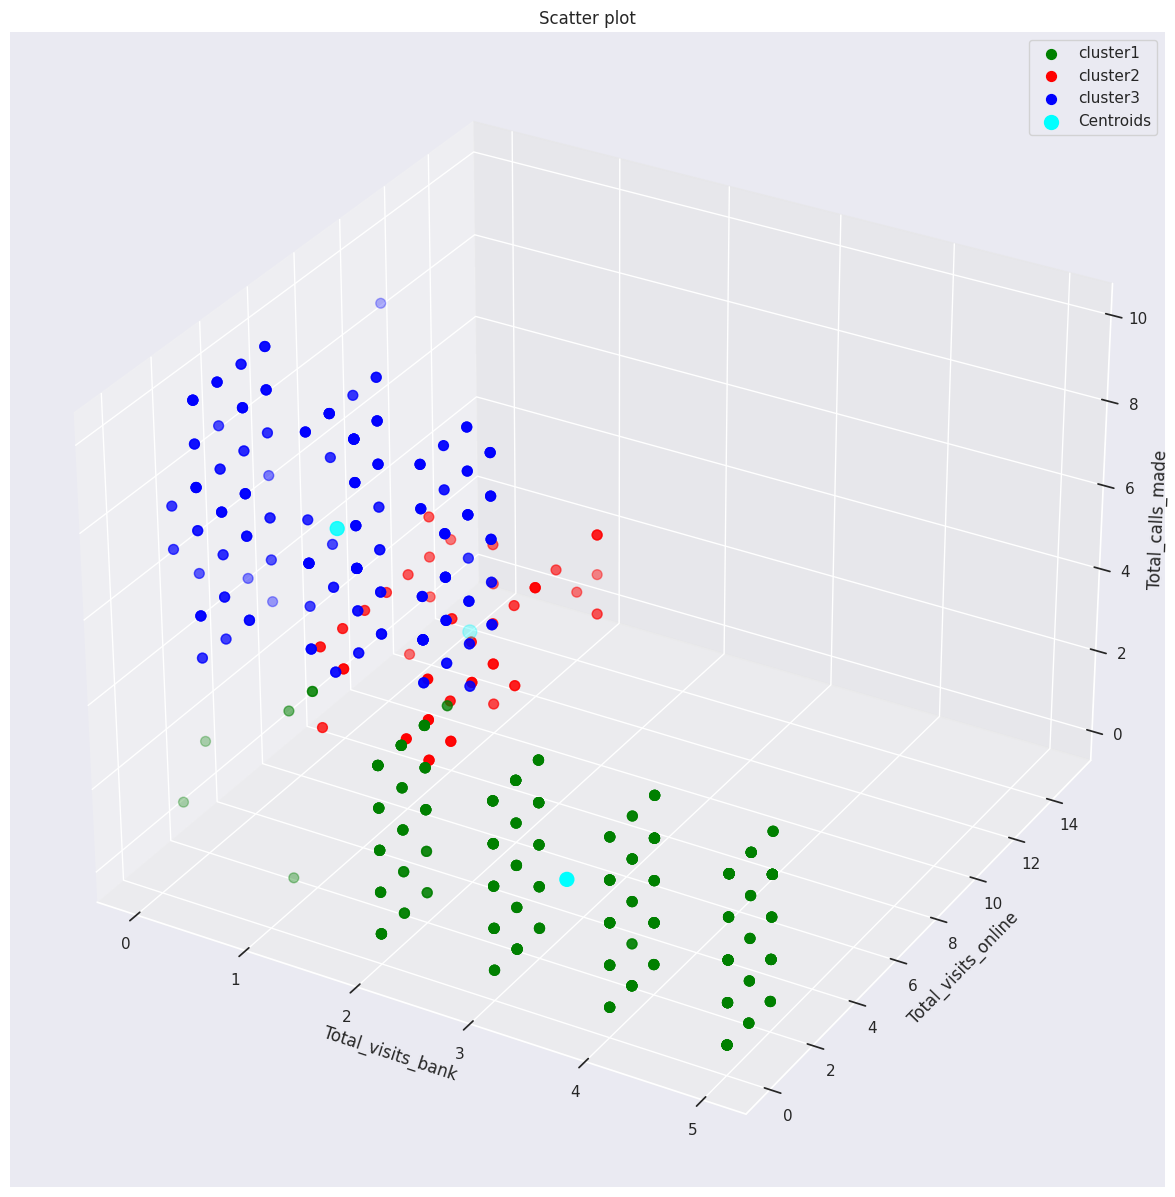

In [47]:
plt.figure(figsize=(15,15))
ax =plt.axes(projection = '3d')
ax.scatter3D(X1[Y1==0,0], X1[Y1==0,1], X1[Y1==0,2], s=50, c='green', label = 'cluster1')
ax.scatter3D(X1[Y1==1,0], X1[Y1==1,1], X1[Y1==1,2], s=50, c='red', label = 'cluster2')
ax.scatter3D(X1[Y1==2,0], X1[Y1==2,1], X1[Y1==2,2], s=50, c='blue', label = 'cluster3')
ax.scatter3D(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1],kmeans1.cluster_centers_[:,2], s=100, c='cyan', label = 'Centroids')
plt.title('Scatter plot')
ax.set_xlabel('Total_visits_bank')
ax.set_ylabel('Total_visits_online')
ax.set_zlabel('Total_calls_made')
plt.legend()

plt.show()